<a href="https://colab.research.google.com/github/hrbae/LG_AI_training/blob/main/M1_Proces_Innovationby_ML/Practice_1_2_Process_Discovery (1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Process Discovery
* **Alpha miner**
* **Heuristic miner**
* **Inductive miner**
*  Genetic miner
*  Fuzzy miner...







In [1]:
!pip install pm4py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26096 sha256=14623f291fbbf4e48e772faae0d3c279d6fc2b744080f5c09dfd98b17d6d0aae
  Stored in directory: /root/.cache/pip/wheels/fa/80/8c/43488a924a046b733b64de3fac99252674c892a4c3801c0a61
Successfully built intervaltree


In [2]:
# 필요 라이브러리 호출
import pm4py
import pandas as pd

from pm4py import discover_petri_net_alpha as alpha
from pm4py import discover_petri_net_inductive as inductive

In [3]:
#Colab drive 모듈 이용하여 연동
from google.colab import drive
drive.mount('/content/gdriv')

Mounted at /content/gdriv


In [4]:
# 실습용 데이터 호출
init_log = pd.read_csv('https://raw.githubusercontent.com/hrbae/LG_AI_training/main/M1_Proces_Innovationby_ML/eventlog%20(2).csv')
print(init_log.columns)
init_log['CustomerID']=init_log['CustomerID'].astype(str)
init_log['TIMESTAMP']=pd.to_datetime(init_log['TIMESTAMP'])
init_log.dtypes

Index(['CustomerID', 'PAGE_NAME', 'TIMESTAMP', 'AgeCategory_x', 'Gender_x',
       'ComplaintTopicID'],
      dtype='object')


CustomerID                  object
PAGE_NAME                   object
TIMESTAMP           datetime64[ns]
AgeCategory_x               object
Gender_x                    object
ComplaintTopicID           float64
dtype: object

In [5]:
# 경고메세지 무시용
import warnings
warnings.filterwarnings('ignore')

eventlog = pm4py.format_dataframe(df= init_log,
                                  case_id= 'CustomerID',
                                  activity_key= 'PAGE_NAME',
                                  timestamp_key= 'TIMESTAMP')

eventlog.head(3)

,CustomerID,PAGE_NAME,TIMESTAMP,AgeCategory_x,Gender_x,ComplaintTopicID,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
0,1000178,taken,2016-01-07 01:30:16.967,50-65,M,20.0,1000178,taken,2016-01-07 01:30:16.967,0,0
1,1000184,taken,2015-07-29 10:25:07.700,18-29,M,20.0,1000184,taken,2015-07-29 10:25:07.700,1,1
2,1000184,mijn_bewijs_van_inschrijving,2015-10-21 08:39:50.823,30-39,M,62.0,1000184,mijn_bewijs_van_inschrijving,2015-10-21 08:39:50.823,2,1


In [7]:
# top 45개의 Variant로 필터링
top45 = pm4py.filter_variants_top_k(eventlog, k = 45)
top45.head()

,CustomerID,PAGE_NAME,TIMESTAMP,AgeCategory_x,Gender_x,ComplaintTopicID,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
0,1000178,taken,2016-01-07 01:30:16.967,50-65,M,20.0,1000178,taken,2016-01-07 01:30:16.967,0,0
13,1000471,vacatures_zoeken,2015-08-15 15:34:32.707,30-39,V,61.0,1000471,vacatures_zoeken,2015-08-15 15:34:32.707,13,3
14,1000471,mijn_werkmap,2015-08-27 15:27:48.250,18-29,M,9.0,1000471,mijn_werkmap,2015-08-27 15:27:48.250,14,3
15,1000471,taken,2015-09-03 16:05:43.937,50-65,M,4.0,1000471,taken,2015-09-03 16:05:43.937,15,3
16,1000583,mijn_werkmap,2015-07-20 14:10:15.413,50-65,M,33.0,1000583,mijn_werkmap,2015-07-20 14:10:15.413,16,4


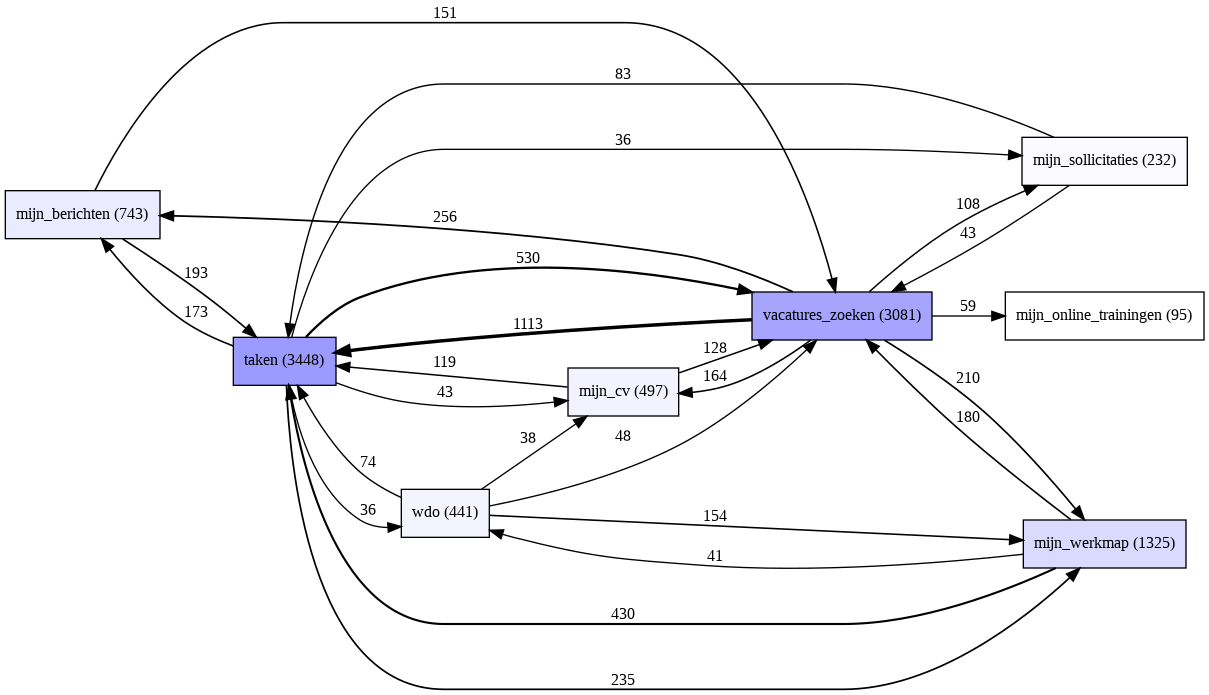

In [14]:
#Directly followed graph(프로세스맵 도출)
#FREQUENCY: 빈도
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualization

dfg=dfg_discovery.apply(top45)
gviz1=dfg_visualization.apply(dfg, log=top45, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz1)

> 실습1> Performace관점에서의 visualization


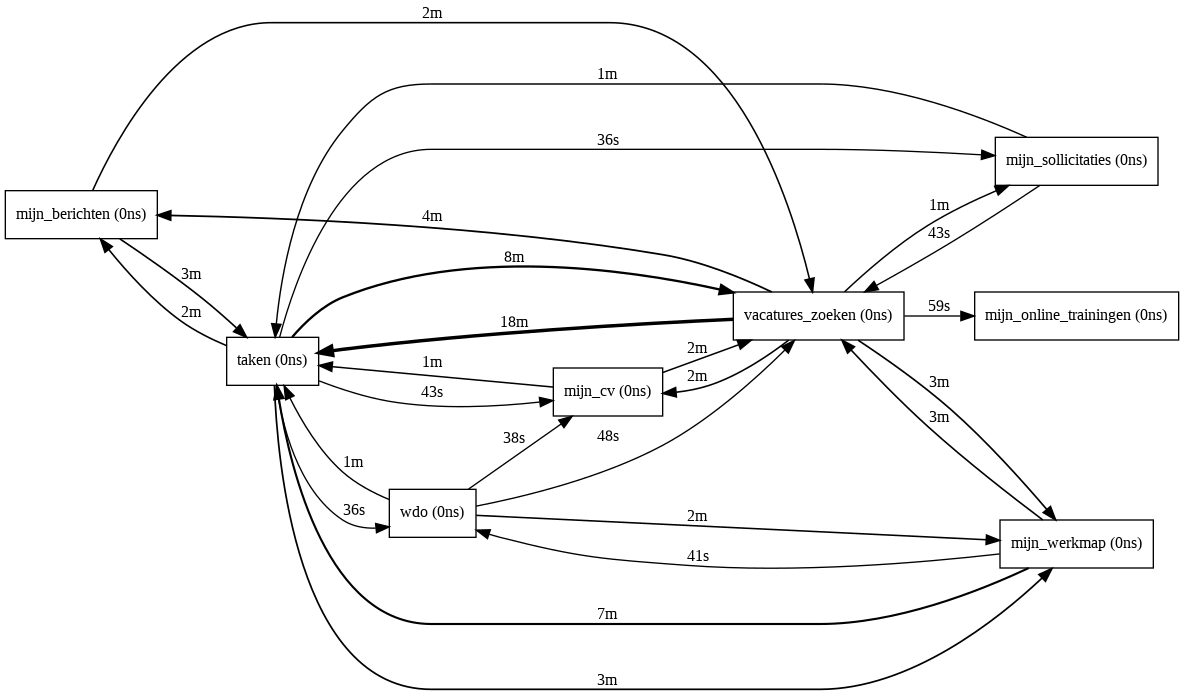

In [24]:
#PERFORMANCE: 소요시간

#실습1> Performace관점에서의 visualization


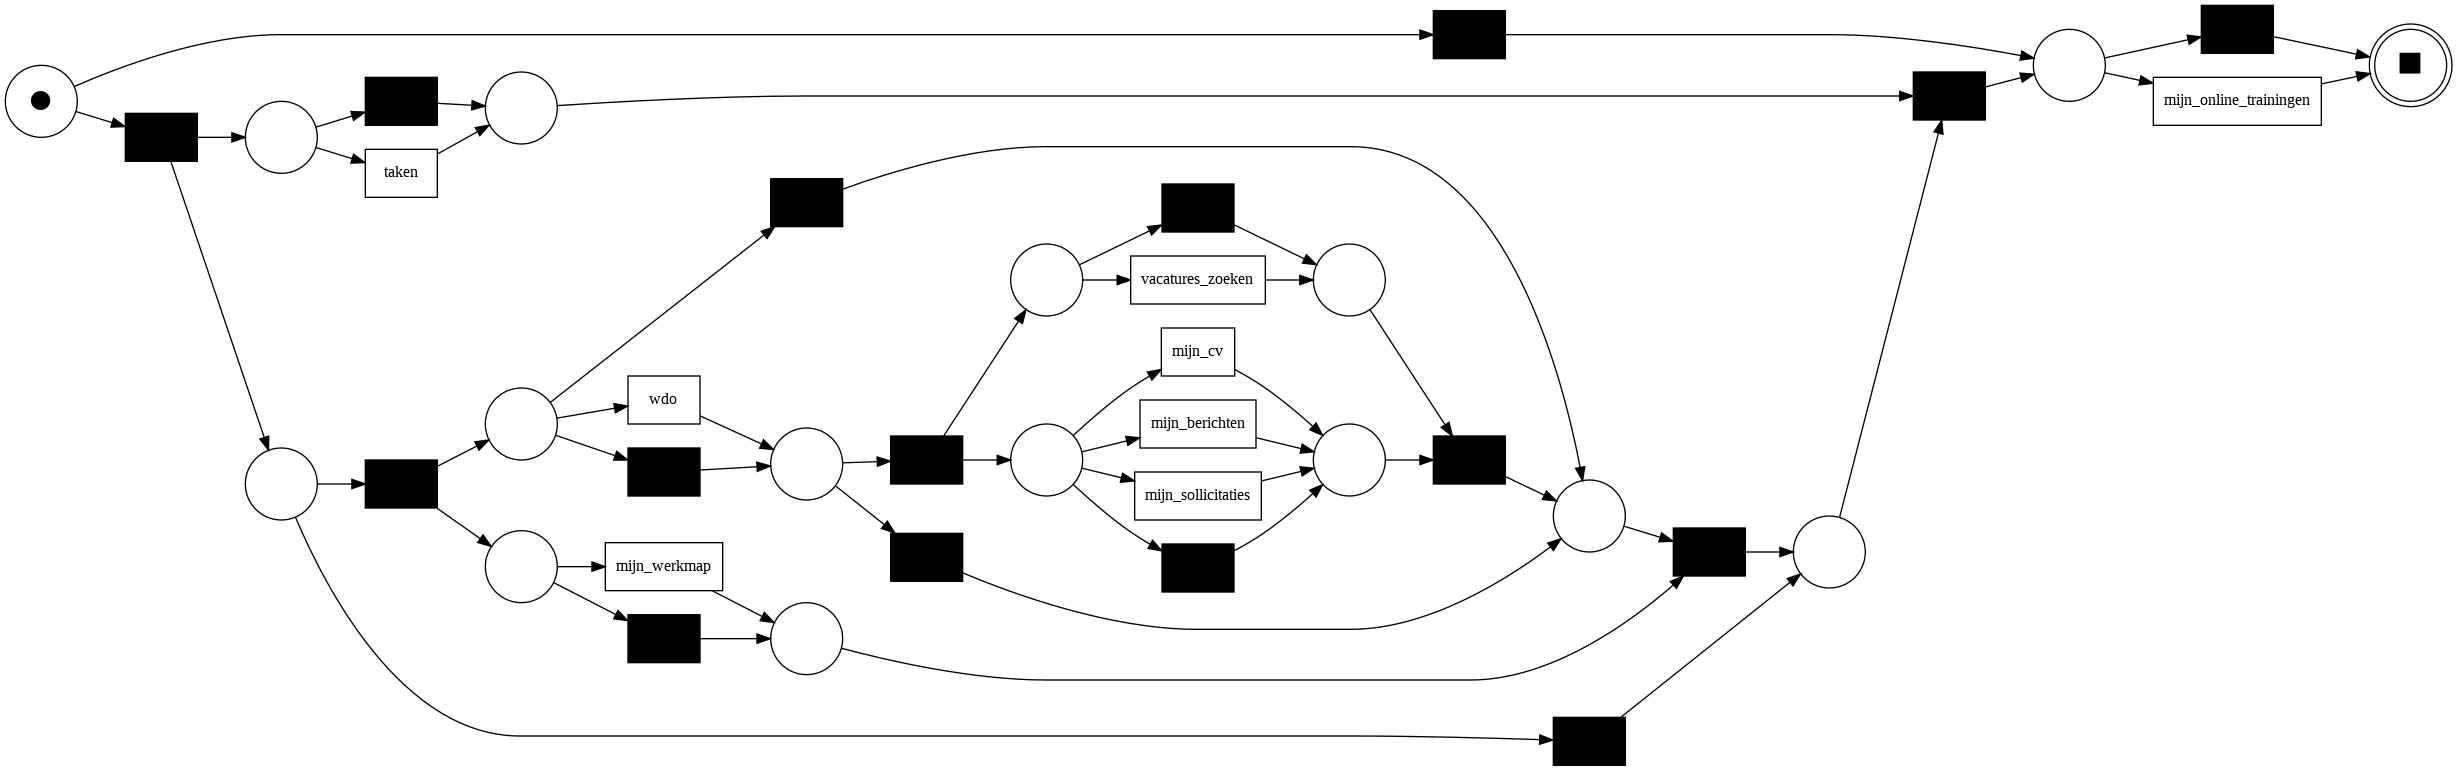

In [16]:
#Inductive miner, Petrinet
net, initial_marking, final_marking = inductive(top45)
pm4py.view_petri_net(net, initial_marking, final_marking)

> 실습2> petrinet_alpha visualization

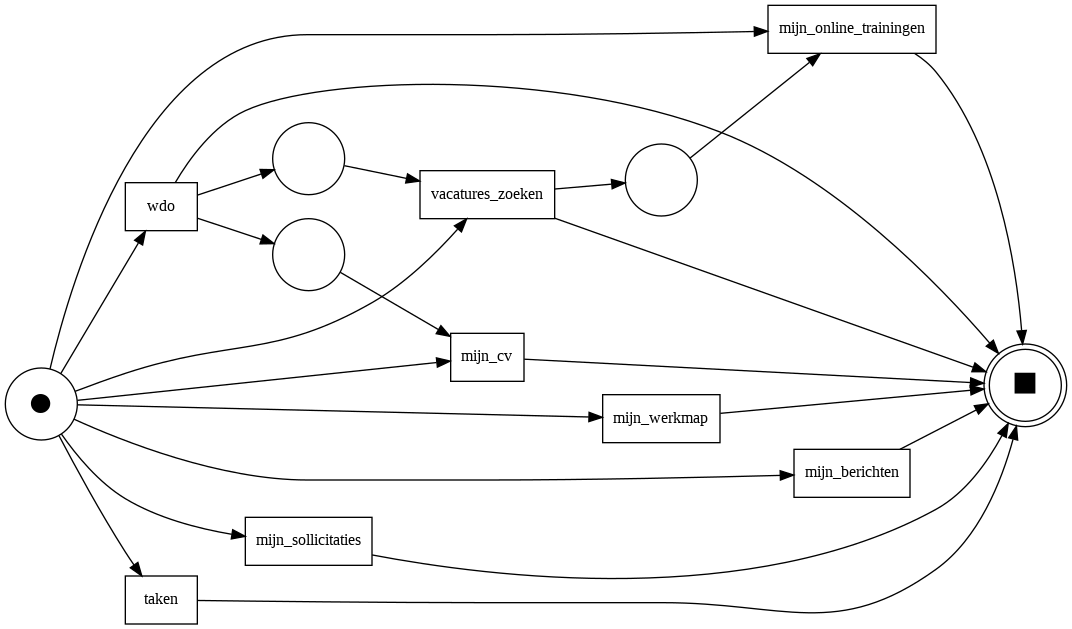

In [17]:
# Alpha miner, Petrinet
net, initial_marking, final_marking = alpha(top45)
#실습2> petrinet_alpha visualization


{'vacatures_zoeken': (node:vacatures_zoeken connections:{mijn_online_trainingen:[0.9833333333333333]}), 'mijn_online_trainingen': (node:mijn_online_trainingen connections:{}), 'wdo': (node:wdo connections:{mijn_werkmap:[0.576530612244898], mijn_cv:[0.9743589743589743], vacatures_zoeken:[0.9795918367346939]}), 'mijn_werkmap': (node:mijn_werkmap connections:{}), 'mijn_cv': (node:mijn_cv connections:{})}


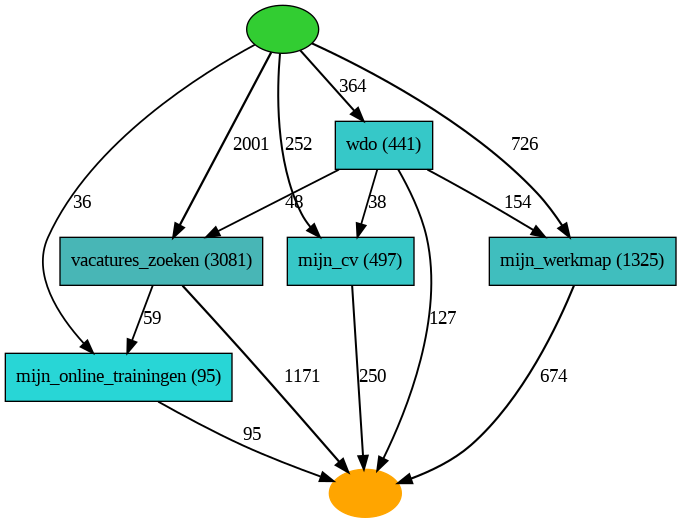

In [25]:
# Heuristic miner
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer

heu_net = heuristics_miner.apply_heu(top45, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.5})
print(heu_net)
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)

#2.프로세스 Discovery 품질 척도
---

*   *Fitness*
*   *Precision*
*   *Generalization*
*   *Simplicity*


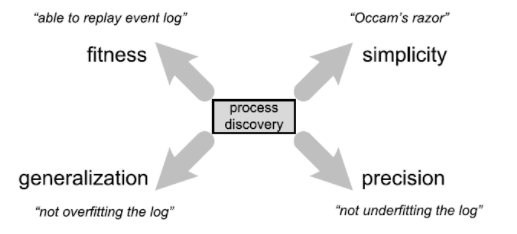


In [27]:
# fitness
from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness_evaluator
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(top45)
fitness = replay_fitness_evaluator.apply(eventlog, net, initial_marking, final_marking, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
print(fitness)

replaying log with TBR, completed traces ::   0%|          | 0/6593 [00:00<?, ?it/s]

{'perc_fit_traces': 68.69576650013147, 'average_trace_fitness': 0.9568969398671456, 'log_fitness': 0.9610134258028451, 'percentage_of_fitting_traces': 68.69576650013147}


In [28]:
# precision
from pm4py.algo.evaluation.precision import algorithm as precision_evaluator
prec = precision_evaluator.apply(eventlog, net, initial_marking, final_marking, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print(prec)

replaying log with TBR, completed traces ::   0%|          | 0/11720 [00:00<?, ?it/s]

0.9666634391779756


In [29]:
# generalization
from pm4py.algo.evaluation.generalization import algorithm as generalization_evaluator
gen = generalization_evaluator.apply(eventlog, net, initial_marking, final_marking)
print(gen)

replaying log with TBR, completed traces ::   0%|          | 0/6593 [00:00<?, ?it/s]

0.9842844371453059


In [ ]:
#실습3>simplicity




0.6097560975609756


#프로세스 모델로부터 이벤트데이터 생성

In [32]:
# 프로세스 모델로부터 가상의 시뮬레이션을 통해 가상의 이벤트 데이터를 생성
from pm4py.algo.simulation.playout.petri_net import algorithm as simulator
simulated_log = simulator.apply(net, initial_marking, variant=simulator.Variants.BASIC_PLAYOUT, parameters={simulator.Variants.BASIC_PLAYOUT.value.Parameters.NO_TRACES: 50})
print(simulated_log)

df = pm4py.convert_to_dataframe(simulated_log)
df.head()

[{'attributes': {'concept:name': '0'}, 'events': []}, '....', {'attributes': {'concept:name': '49'}, 'events': []}]


,concept:name,time:timestamp,case:concept:name
0,mijn_online_trainingen,1970-04-26 17:46:40,1
1,taken,1970-04-26 17:46:41,3
2,mijn_online_trainingen,1970-04-26 17:46:42,3
3,taken,1970-04-26 17:46:43,5
4,mijn_werkmap,1970-04-26 17:46:44,5
